In [ ]:
install.packages("dplyr")
library(dplyr)
install.packages("scatterPlotMatrix")
library(scatterPlotMatrix)
install.packages("psych")
library(psych)
install.packages("Hmisc")
library(Hmisc)
install.packages("reshape2")
library(reshape2)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Installing package into ‘/usr/local/lib/R/site-library’
(

# Множественная регрессия

In [ ]:
df1 <- read.csv("/content/Real estate.csv", header = TRUE)
head(df1)

,No,X1.transaction.date,X2.house.age,X3.distance.to.the.nearest.MRT.station,X4.number.of.convenience.stores,X5.latitude,X6.longitude,Y.house.price.of.unit.area
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


In [ ]:
names(df1)

[1] "No"                                    
[2] "X1.transaction.date"                   
[3] "X2.house.age"                          
[4] "X3.distance.to.the.nearest.MRT.station"
[5] "X4.number.of.convenience.stores"       
[6] "X5.latitude"                           
[7] "X6.longitude"                          
[8] "Y.house.price.of.unit.area"

Оставим нужные столбцы.

In [ ]:
df <- df1[, c('X1.transaction.date','X2.house.age','X3.distance.to.the.nearest.MRT.station','X4.number.of.convenience.stores','X5.latitude','X6.longitude','Y.house.price.of.unit.area')]
head(df)

,X1.transaction.date,X2.house.age,X3.distance.to.the.nearest.MRT.station,X4.number.of.convenience.stores,X5.latitude,X6.longitude,Y.house.price.of.unit.area
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


Для более удобной работы переименуем столбцы.

In [ ]:
names(df) <- c("trans_date", "house_age", "dist_to_MRT", "conv_stores", "latitude", "longitude","price_of_unit")
head(df)

,trans_date,house_age,dist_to_MRT,conv_stores,latitude,longitude,price_of_unit
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


**Описание признаков:**
* trans_date - дата покупки
* house_age - возраст постройки (года)
* dist_to_MRT - расстояние до ближайшеё станции метро (метры)
* conv_stores - количество круглосуточных магазинов в шаговой доступности
* latitude - географическая широта здания
* longitude - географическая долгота здания

**Целевая переменная:**

price_of_unit - цена 1 пинга (3.3 $\text{м}^2$) недвижимости в десятках тысяч тайваньских долларов

In [ ]:
sum(is.na(df))

[1] 0

Посмотрим на распределения признаков.

In [ ]:
summary(df)

   trans_date     house_age       dist_to_MRT       conv_stores    
 Min.   :2013   Min.   : 0.000   Min.   :  23.38   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 9.025   1st Qu.: 289.32   1st Qu.: 1.000  
 Median :2013   Median :16.100   Median : 492.23   Median : 4.000  
 Mean   :2013   Mean   :17.713   Mean   :1083.89   Mean   : 4.094  
 3rd Qu.:2013   3rd Qu.:28.150   3rd Qu.:1454.28   3rd Qu.: 6.000  
 Max.   :2014   Max.   :43.800   Max.   :6488.02   Max.   :10.000  
    latitude       longitude     price_of_unit   
 Min.   :24.93   Min.   :121.5   Min.   :  7.60  
 1st Qu.:24.96   1st Qu.:121.5   1st Qu.: 27.70  
 Median :24.97   Median :121.5   Median : 38.45  
 Mean   :24.97   Mean   :121.5   Mean   : 37.98  
 3rd Qu.:24.98   3rd Qu.:121.5   3rd Qu.: 46.60  
 Max.   :25.01   Max.   :121.6   Max.   :117.50  

Изобразим графики для всех пар признаков.

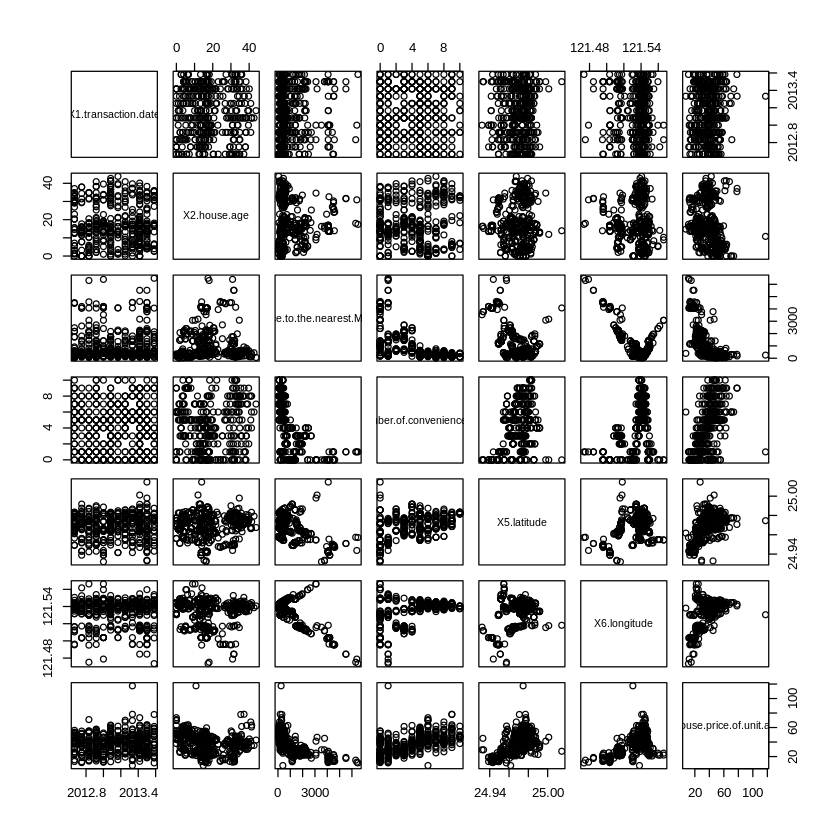

In [ ]:
plot(df)

Также рассмотрим распределение каждого признака отдельно.

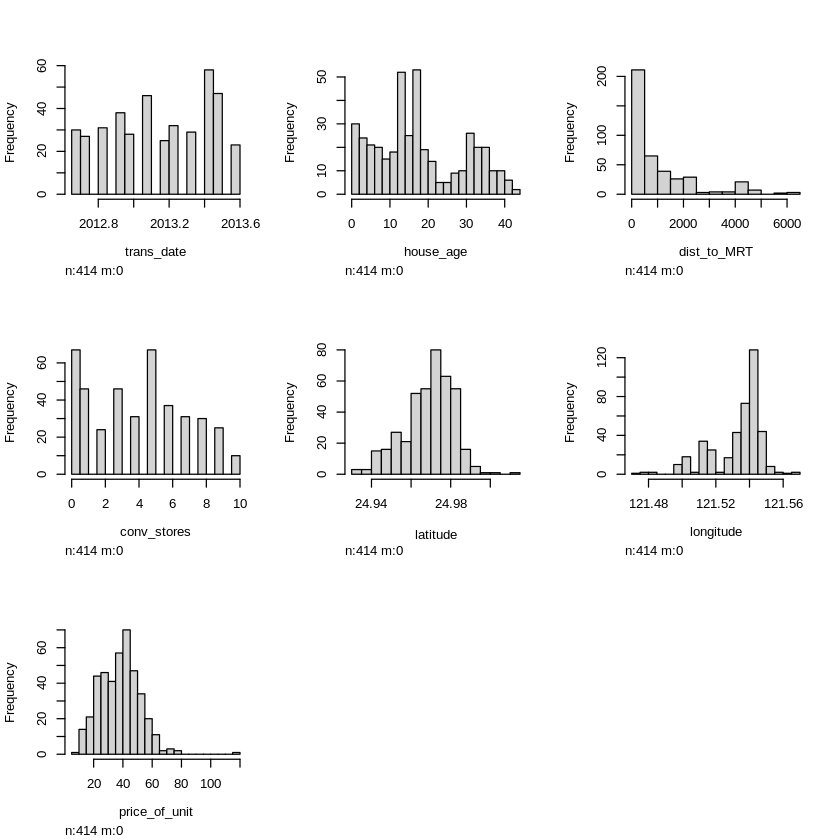

In [ ]:
hist.data.frame(df)

Прологарифмируем третий признак, чтобы добиться распределения, более похожего на нормальное.

In [ ]:
df$dist_to_MRT <- log(df$dist_to_MRT)

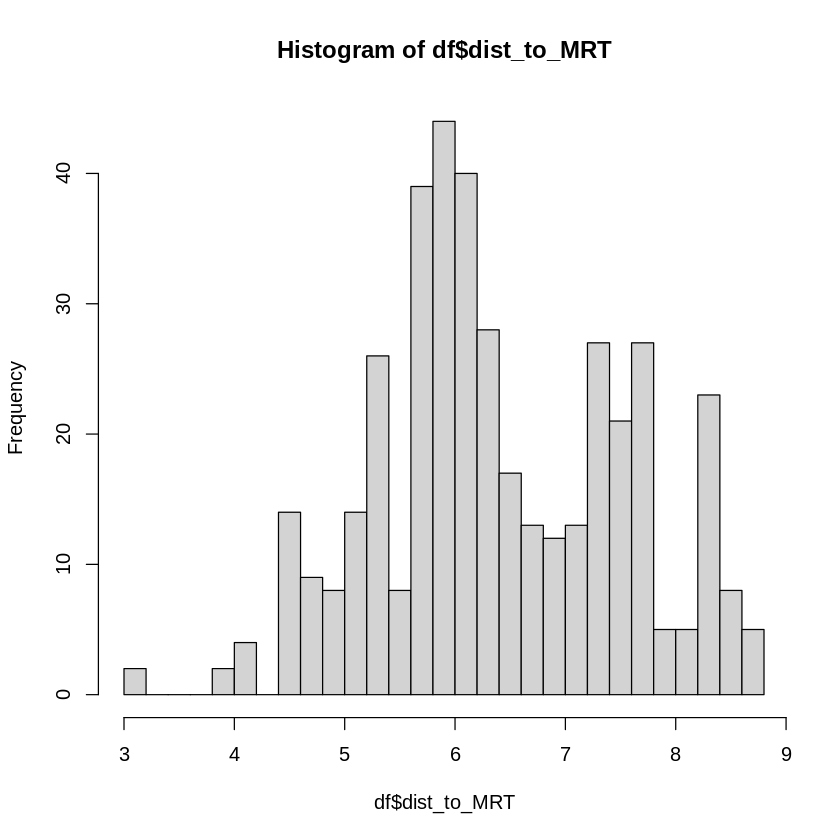

In [ ]:
hist(df$dist_to_MRT, breaks = 30)

Распределение целевой переменной

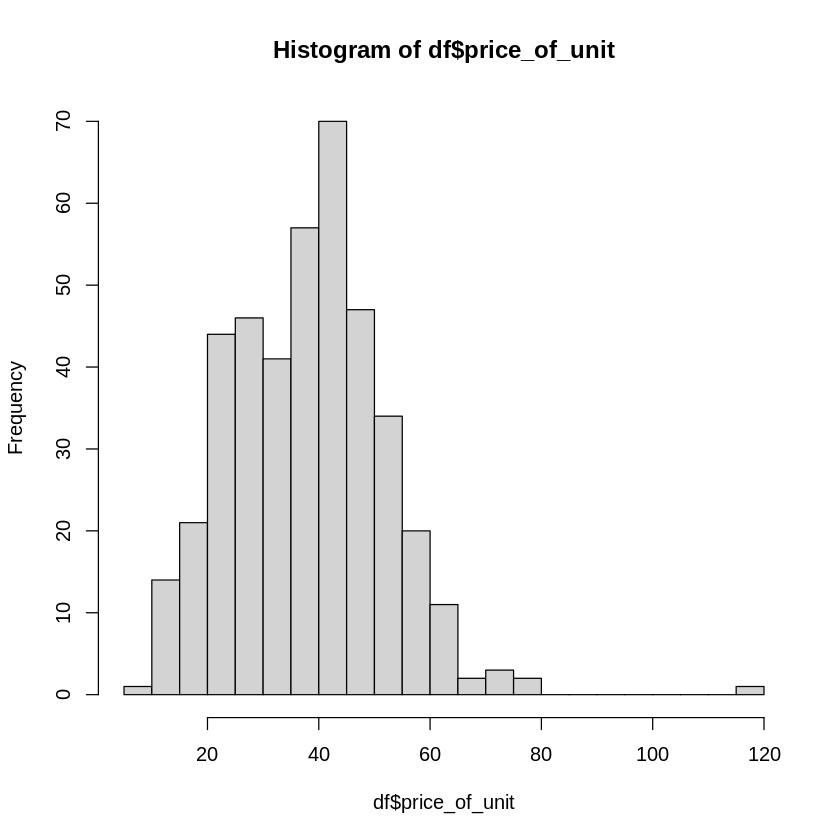

In [ ]:
hist(df$price_of_unit, breaks = 30)

Удалим выбивающиеся значения.

In [ ]:
df <- df |> filter(price_of_unit <= 100)

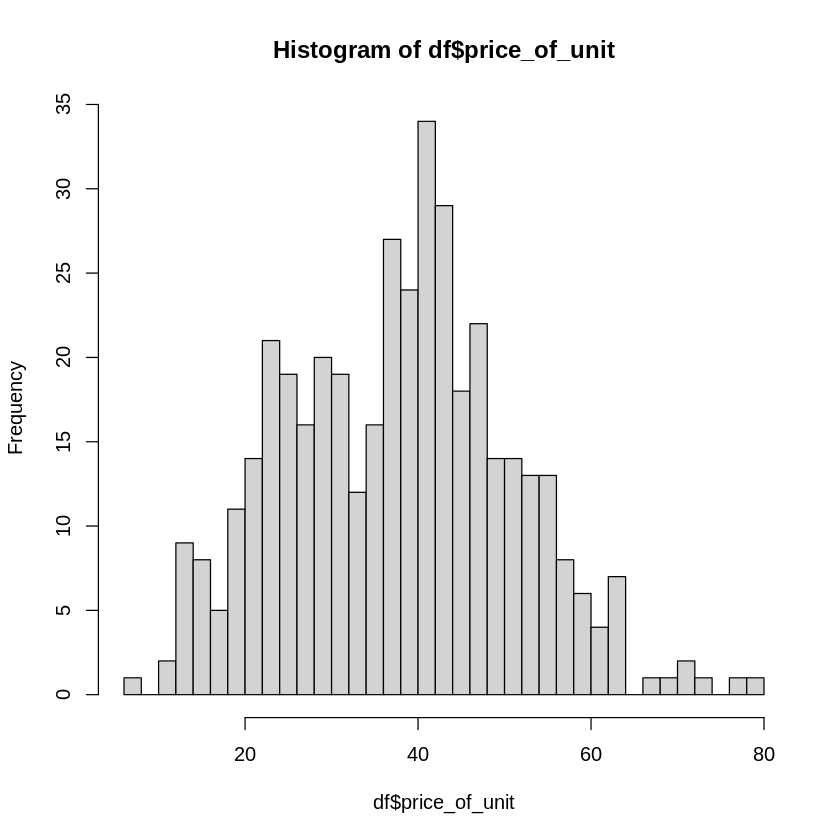

In [ ]:
hist(df$price_of_unit, breaks = 30)

Матрица корреляций признаков

In [ ]:
corm <- cor(df)
corm

,trans_date,house_age,dist_to_MRT,conv_stores,latitude,longitude,price_of_unit
trans_date,1.000000000,0.01754877,0.09774522,0.009635445,0.03505776,-0.04108178,0.08171535
house_age,0.017548767,1.00000000,0.06732215,0.049592513,0.05441990,-0.04852005,-0.21091233
dist_to_MRT,0.097745220,0.06732215,1.00000000,-0.685516149,-0.45666349,-0.64950342,-0.75546177
conv_stores,0.009635445,0.04959251,-0.68551615,1.000000000,0.44414331,0.44909901,0.61177651
latitude,0.035057756,0.05441990,-0.45666349,0.444143306,1.00000000,0.41292394,0.56383201
longitude,-0.041081778,-0.04852005,-0.64950342,0.449099007,0.41292394,1.00000000,0.54921910
price_of_unit,0.081715353,-0.21091233,-0.75546177,0.611776511,0.56383201,0.54921910,1.00000000


Изобразим более наглядно.

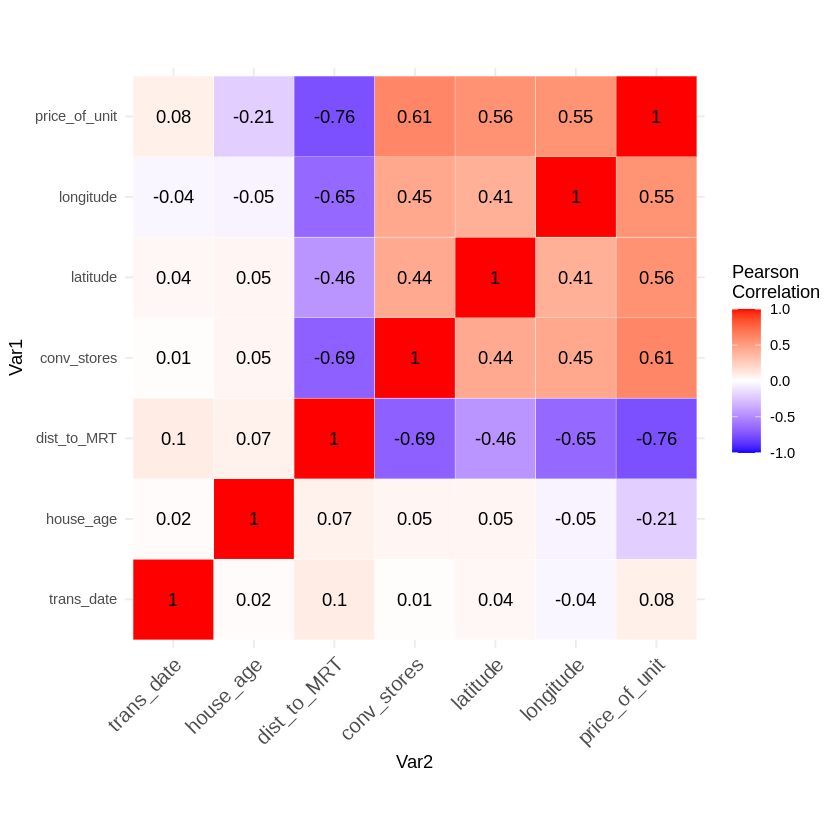

In [ ]:
ggplot(data = melt(round(corm,2), na.rm = TRUE), aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white",
   midpoint = 0, limit = c(-1,1), space = "Lab",
   name="Pearson\nCorrelation") +
  theme_minimal()+
 theme(axis.text.x = element_text(angle = 45, vjust = 1,
    size = 12, hjust = 1))+
 coord_fixed()+
 geom_text(aes(label = value))

Переменные `trans_date` и `house_age` довольно слабо коррелируют с целевой переменной. Остальные переменные коррелируют сильнее. Наибольшая по модулю корреляция с `pric_of_unit` характерна для переменной `dist_to_MRT`.

In [ ]:
model = lm(formula = price_of_unit ~ ., data = df)
summary(model)


Call:
lm(formula = price_of_unit ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.752  -4.180  -0.276   3.239  34.317 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.282e+04  4.476e+03  -5.100 5.23e-07 ***
trans_date   5.954e+00  1.287e+00   4.625 5.05e-06 ***
house_age   -2.253e-01  3.186e-02  -7.072 6.72e-12 ***
dist_to_MRT -6.116e+00  5.318e-01 -11.502  < 2e-16 ***
conv_stores  5.567e-01  1.734e-01   3.210  0.00143 ** 
latitude     2.710e+02  3.380e+01   8.019 1.15e-14 ***
longitude    3.415e+01  3.120e+01   1.095  0.27435    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.273 on 406 degrees of freedom
Multiple R-squared:  0.6937,	Adjusted R-squared:  0.6892 
F-statistic: 153.3 on 6 and 406 DF,  p-value: < 2.2e-16


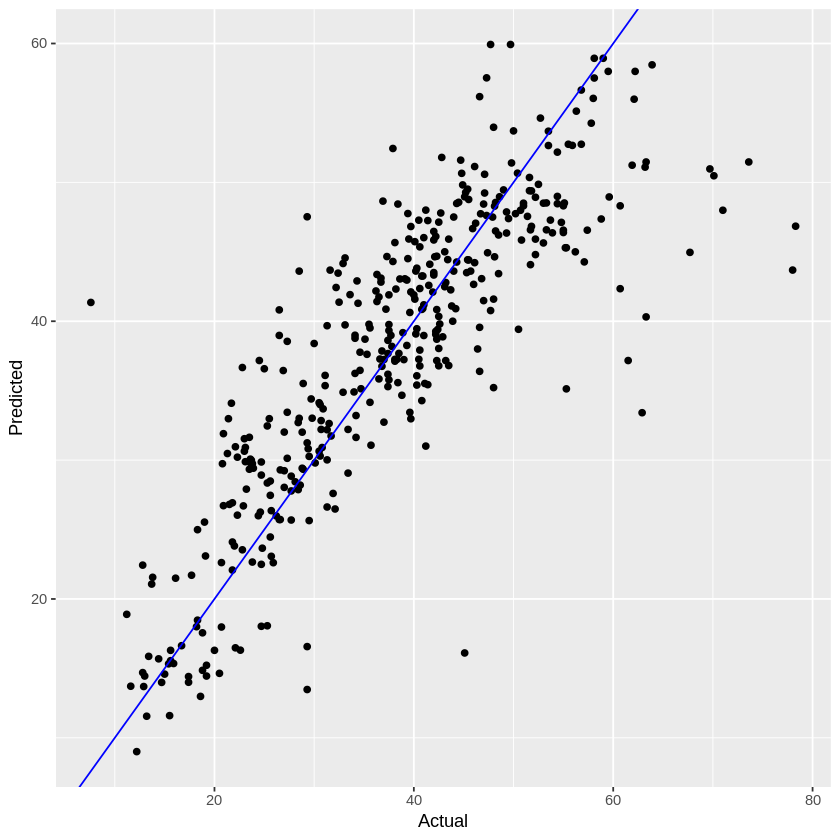

In [ ]:
pred <- predict(model, df)

ggplot(data = df, aes(x = price_of_unit, y = pred)) +
  geom_point() + geom_abline(slope = 1, intercept = 0, color = "blue") +
  labs(x = "Actual", y = "Predicted")

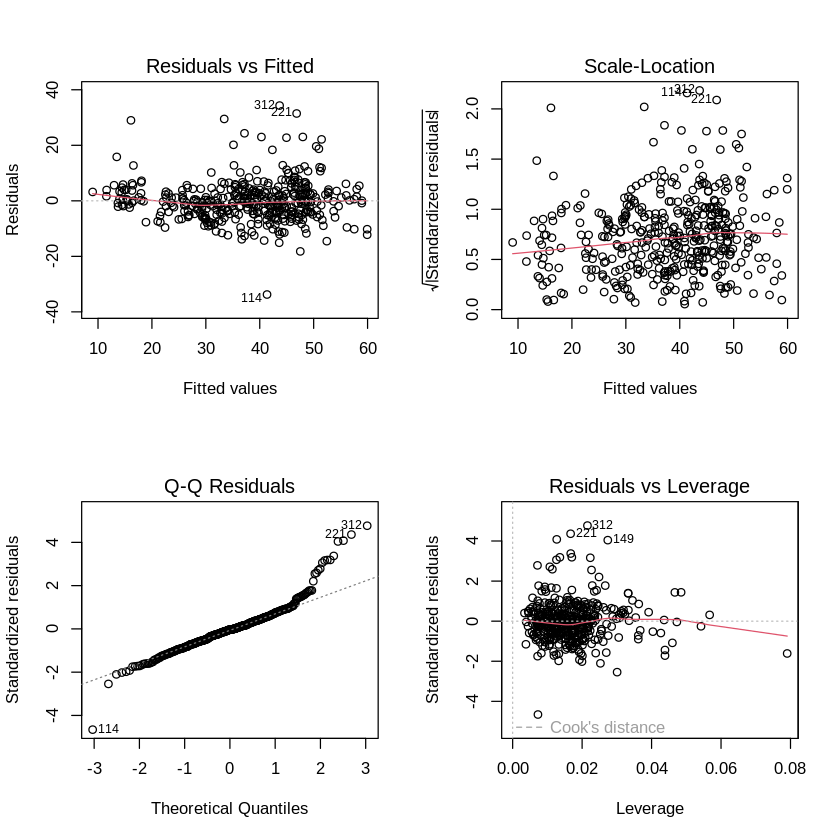

In [ ]:
layout(matrix(c(1,2,3,4),2,2)) # optional 4 graphs/page
plot(model)

 Уберём незначимую переменную.


Call:
lm(formula = price_of_unit ~ trans_date + house_age + dist_to_MRT + 
    conv_stores + latitude, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.656  -4.117  -0.282   3.067  34.409 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.889e+04  2.666e+03  -7.086 6.14e-12 ***
trans_date   5.981e+00  1.287e+00   4.646 4.59e-06 ***
house_age   -2.260e-01  3.186e-02  -7.095 5.80e-12 ***
dist_to_MRT -6.400e+00  4.646e-01 -13.776  < 2e-16 ***
conv_stores  5.504e-01  1.734e-01   3.175  0.00161 ** 
latitude     2.775e+02  3.329e+01   8.337 1.19e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.275 on 407 degrees of freedom
Multiple R-squared:  0.6928,	Adjusted R-squared:  0.6891 
F-statistic: 183.6 on 5 and 407 DF,  p-value: < 2.2e-16


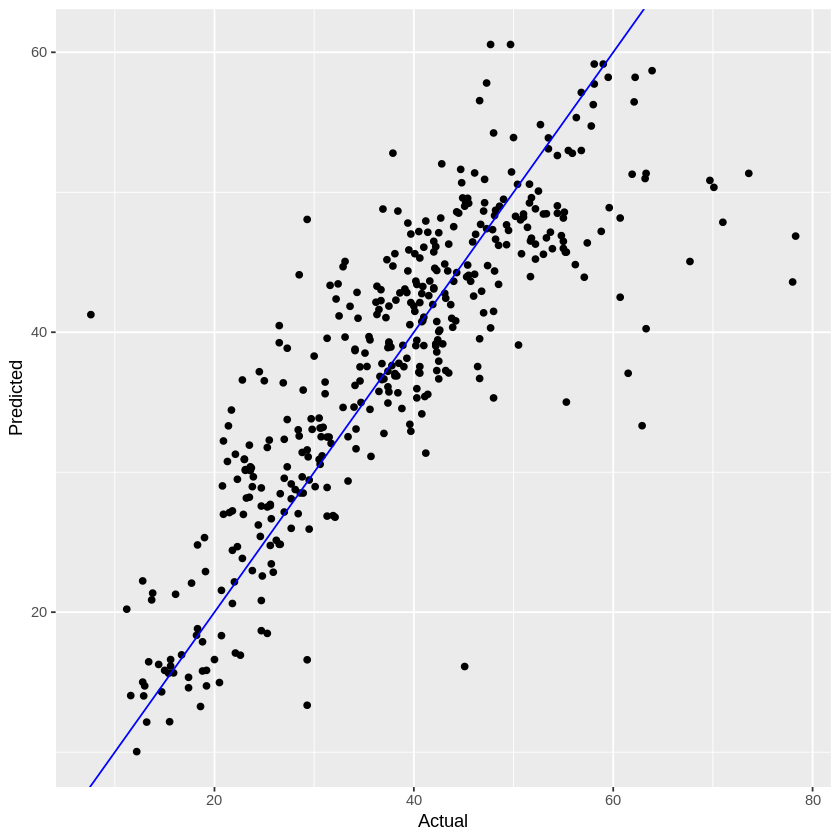

In [ ]:
model1 = lm(formula = price_of_unit ~ trans_date +
    house_age + dist_to_MRT + conv_stores + latitude,
    data = df)
summary(model1)
pred <- predict(model1, df)

ggplot(data = df, aes(x = price_of_unit, y = pred)) +
  geom_point() + geom_abline(slope = 1, intercept = 0, color = "blue") +
  labs( x = "Actual", y = "Predicted")


Call:
lm(formula = price_of_unit ~ trans_date + house_age + dist_to_MRT + 
    latitude, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.889  -3.960  -0.264   3.220  36.126 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.015e+04  2.665e+03  -7.561 2.68e-13 ***
trans_date   6.367e+00  1.296e+00   4.914 1.30e-06 ***
house_age   -2.146e-01  3.200e-02  -6.705 6.74e-11 ***
dist_to_MRT -7.314e+00  3.685e-01 -19.850  < 2e-16 ***
latitude     2.972e+02  3.307e+01   8.988  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.355 on 408 degrees of freedom
Multiple R-squared:  0.6852,	Adjusted R-squared:  0.6821 
F-statistic:   222 on 4 and 408 DF,  p-value: < 2.2e-16


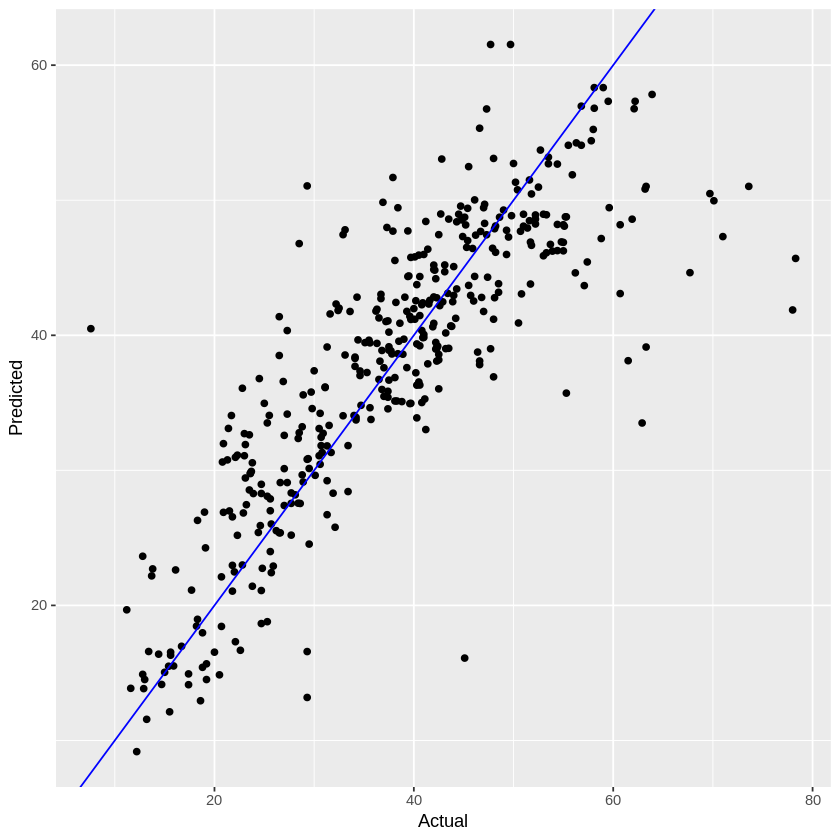

In [ ]:
model2 = lm(formula = price_of_unit ~ trans_date +
    house_age + dist_to_MRT + latitude,
    data = df)
summary(model2)
pred <- predict(model2, df)

ggplot(data = df, aes(x = price_of_unit, y = pred)) +
  geom_point() + geom_abline(slope = 1, intercept = 0, color = "blue") +
  labs(x = "Actual", y = "Predicted")

## Пошаговая процедура

### Прямая

In [ ]:
# Initialize an empty model
forward_model <- lm(price_of_unit ~ ., data = df)
# Forward stepwise regression
forward_model <- step(forward_model, direction = "forward", scope = formula(~ .))

Start:  AIC=1645.87
price_of_unit ~ trans_date + house_age + dist_to_MRT + conv_stores + 
    latitude + longitude




Call:
lm(formula = price_of_unit ~ trans_date + house_age + dist_to_MRT + 
    conv_stores + latitude + longitude, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.752  -4.180  -0.276   3.239  34.317 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.282e+04  4.476e+03  -5.100 5.23e-07 ***
trans_date   5.954e+00  1.287e+00   4.625 5.05e-06 ***
house_age   -2.253e-01  3.186e-02  -7.072 6.72e-12 ***
dist_to_MRT -6.116e+00  5.318e-01 -11.502  < 2e-16 ***
conv_stores  5.567e-01  1.734e-01   3.210  0.00143 ** 
latitude     2.710e+02  3.380e+01   8.019 1.15e-14 ***
longitude    3.415e+01  3.120e+01   1.095  0.27435    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.273 on 406 degrees of freedom
Multiple R-squared:  0.6937,	Adjusted R-squared:  0.6892 
F-statistic: 153.3 on 6 and 406 DF,  p-value: < 2.2e-16


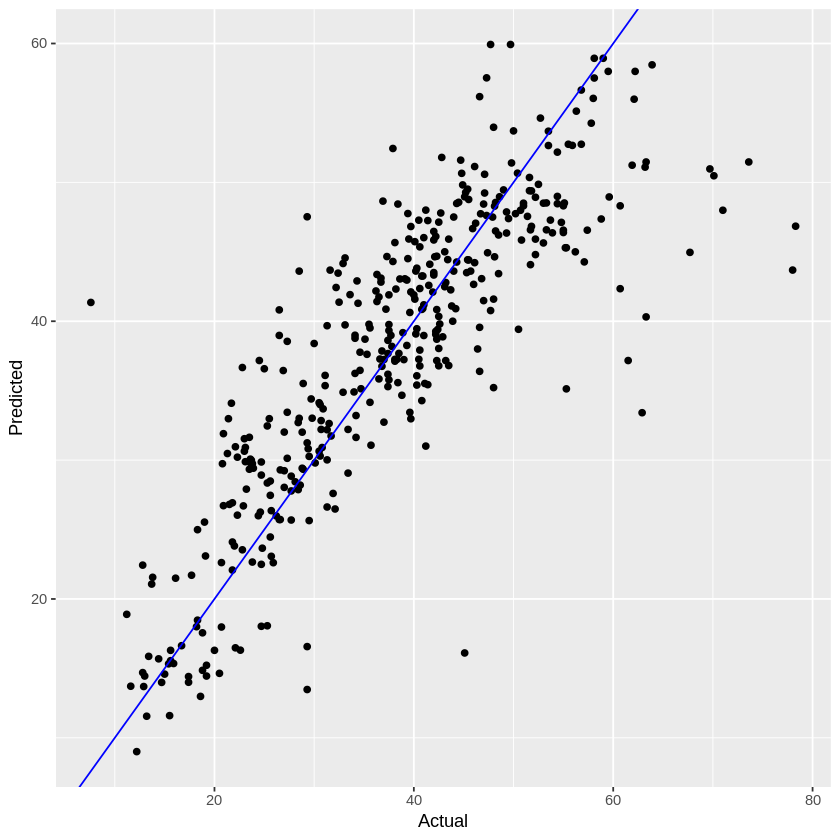

In [ ]:
summary(forward_model)
pred <- predict(forward_model, df)
ggplot(data = df, aes(x = price_of_unit, y = pred)) +
  geom_point() + geom_abline(slope = 1, intercept = 0, color = "blue") +
  labs(x = "Actual", y = "Predicted")

### Обратная

In [ ]:
# Initialize a model with all predictors
backward_model <- lm(price_of_unit ~ ., data = df)
# Backward stepwise regression
backward_model <- step(backward_model, direction = "backward")

Start:  AIC=1645.87
price_of_unit ~ trans_date + house_age + dist_to_MRT + conv_stores + 
    latitude + longitude

              Df Sum of Sq   RSS    AIC
- longitude    1      63.4 21540 1645.1
<none>                     21476 1645.9
- conv_stores  1     545.1 22022 1654.2
- trans_date   1    1131.4 22608 1665.1
- house_age    1    2645.6 24122 1691.8
- latitude     1    3401.2 24878 1704.6
- dist_to_MRT  1    6997.5 28474 1760.3

Step:  AIC=1645.09
price_of_unit ~ trans_date + house_age + dist_to_MRT + conv_stores + 
    latitude

              Df Sum of Sq   RSS    AIC
<none>                     21540 1645.1
- conv_stores  1     533.4 22073 1653.2
- trans_date   1    1142.1 22682 1664.4
- house_age    1    2663.7 24204 1691.2
- latitude     1    3678.3 25218 1708.2
- dist_to_MRT  1   10043.3 31583 1801.2



Call:
lm(formula = price_of_unit ~ trans_date + house_age + dist_to_MRT + 
    conv_stores + latitude, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.656  -4.117  -0.282   3.067  34.409 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.889e+04  2.666e+03  -7.086 6.14e-12 ***
trans_date   5.981e+00  1.287e+00   4.646 4.59e-06 ***
house_age   -2.260e-01  3.186e-02  -7.095 5.80e-12 ***
dist_to_MRT -6.400e+00  4.646e-01 -13.776  < 2e-16 ***
conv_stores  5.504e-01  1.734e-01   3.175  0.00161 ** 
latitude     2.775e+02  3.329e+01   8.337 1.19e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.275 on 407 degrees of freedom
Multiple R-squared:  0.6928,	Adjusted R-squared:  0.6891 
F-statistic: 183.6 on 5 and 407 DF,  p-value: < 2.2e-16


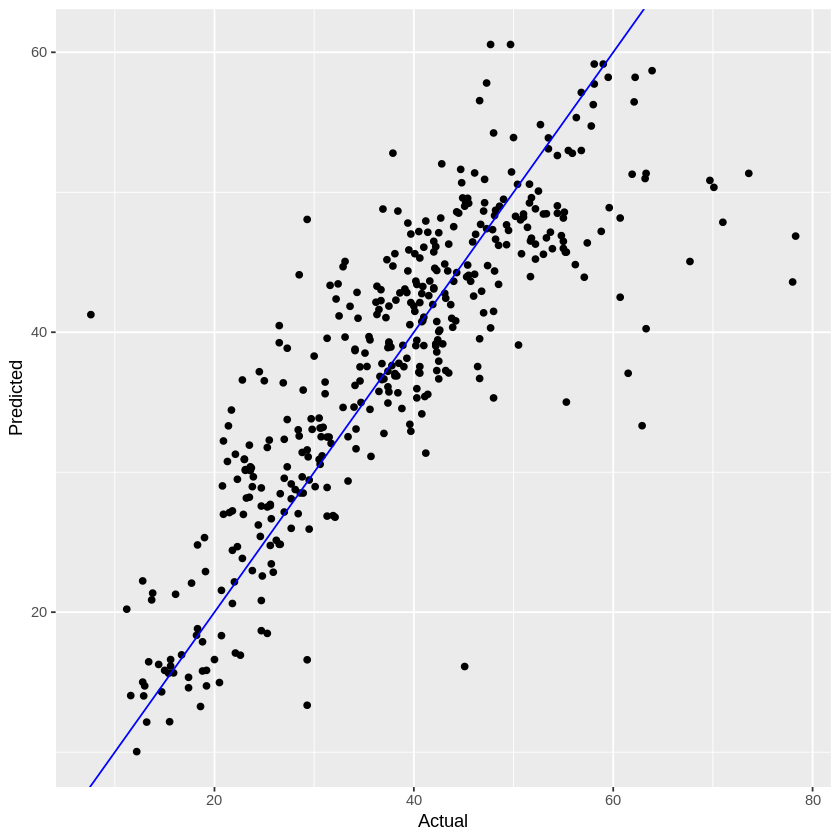

In [ ]:
summary(backward_model)
pred <- predict(backward_model, df)
ggplot(data = df, aes(x = price_of_unit, y = pred)) +
  geom_point() + geom_abline(slope = 1, intercept = 0, color = "blue") +
  labs(x = "Actual", y = "Predicted")

### Двусторонняя

In [ ]:
# Initialize a model with all predictors
both_model <- lm(price_of_unit ~ ., data = df)
# Both-direction stepwise regression
both_model <- step(both_model, direction = "both")

Start:  AIC=1645.87
price_of_unit ~ trans_date + house_age + dist_to_MRT + conv_stores + 
    latitude + longitude

              Df Sum of Sq   RSS    AIC
- longitude    1      63.4 21540 1645.1
<none>                     21476 1645.9
- conv_stores  1     545.1 22022 1654.2
- trans_date   1    1131.4 22608 1665.1
- house_age    1    2645.6 24122 1691.8
- latitude     1    3401.2 24878 1704.6
- dist_to_MRT  1    6997.5 28474 1760.3

Step:  AIC=1645.09
price_of_unit ~ trans_date + house_age + dist_to_MRT + conv_stores + 
    latitude

              Df Sum of Sq   RSS    AIC
<none>                     21540 1645.1
+ longitude    1      63.4 21476 1645.9
- conv_stores  1     533.4 22073 1653.2
- trans_date   1    1142.1 22682 1664.4
- house_age    1    2663.7 24204 1691.2
- latitude     1    3678.3 25218 1708.2
- dist_to_MRT  1   10043.3 31583 1801.2



Call:
lm(formula = price_of_unit ~ trans_date + house_age + dist_to_MRT + 
    conv_stores + latitude, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.656  -4.117  -0.282   3.067  34.409 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.889e+04  2.666e+03  -7.086 6.14e-12 ***
trans_date   5.981e+00  1.287e+00   4.646 4.59e-06 ***
house_age   -2.260e-01  3.186e-02  -7.095 5.80e-12 ***
dist_to_MRT -6.400e+00  4.646e-01 -13.776  < 2e-16 ***
conv_stores  5.504e-01  1.734e-01   3.175  0.00161 ** 
latitude     2.775e+02  3.329e+01   8.337 1.19e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.275 on 407 degrees of freedom
Multiple R-squared:  0.6928,	Adjusted R-squared:  0.6891 
F-statistic: 183.6 on 5 and 407 DF,  p-value: < 2.2e-16


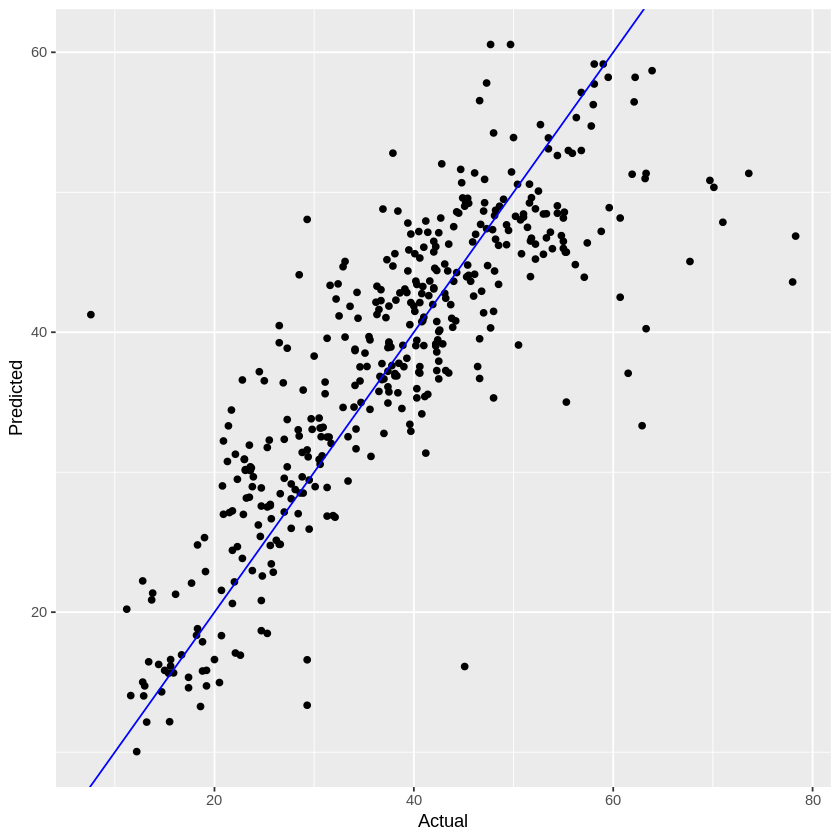

In [ ]:
summary(both_model)
pred <- predict(both_model, df)
ggplot(data = df, aes(x = price_of_unit, y = pred)) +
  geom_point() + geom_abline(slope = 1, intercept = 0, color = "blue") +
  labs(x = "Actual", y = "Predicted")